# An example of an end to end modeling process

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Source for the penguin dataset:
https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

In [ ]:
# load the data set
penguin = pd.read_csv('penguins_size.csv')
# Drop rows with any NaN values
penguin = penguin.dropna()
penguin.keys()

(344, 7)
(334, 7)


In [41]:
# how many samples, how many features?
print(penguin.shape)


(334, 7)


In [25]:
# Encode species to get a numeric target
le = LabelEncoder()
penguin["species_encoded"] = le.fit_transform(penguin["species"])
target_names = le.classes_

# Define feature columns to use later
feature_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

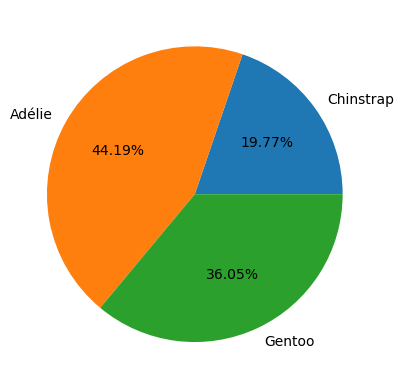

In [26]:
# What is the fraction of each penguin species?
l = ['Chinstrap', 'Adélie', 'Gentoo']
s = [sum(penguin.species=='Chinstrap'),sum(penguin.species=='Adelie'),sum(penguin.species=='Gentoo')]

fig, ax = plt.subplots()
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

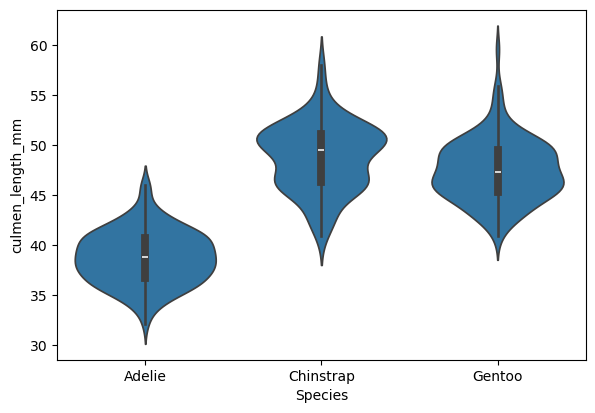

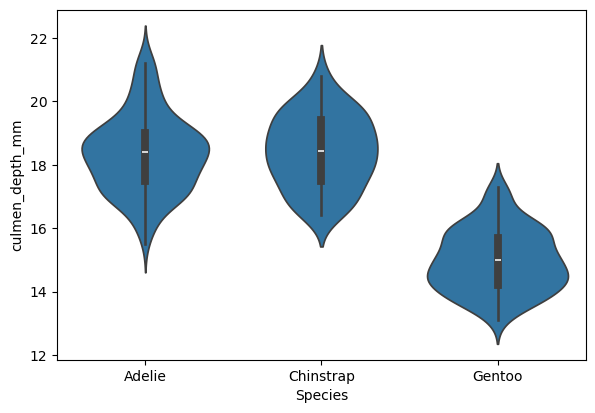

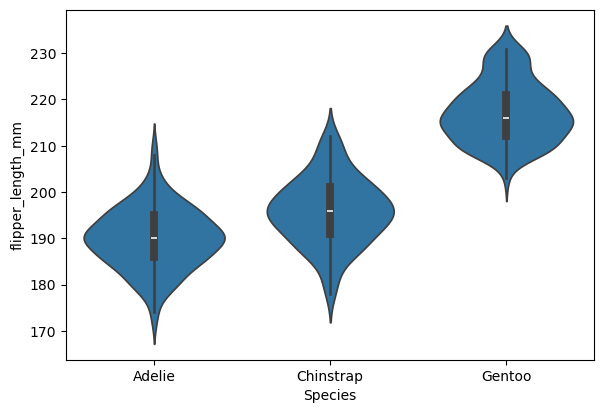

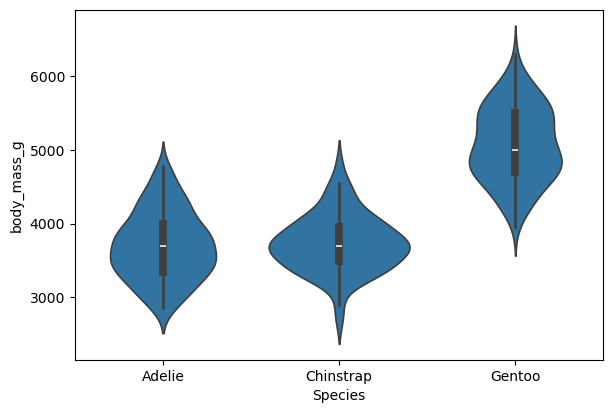

In [27]:
# Violin plots
for iFeature, feature in enumerate(feature_columns):
    plt.figure(figsize=(15, 10))
    plt.subplot(2,2,1)
    ax = sns.violinplot(x='species', y=feature, data=penguin)
    ax.set_ylabel(feature)
    ax.set_xlabel('Species')

In [28]:
# Features (numeric columns)
X = penguin[feature_columns]

# Target (already encoded)
y = penguin["species_encoded"]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(258, 4)
(86, 4)


In [29]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=250)
model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_test_scaled)
y_pred_test = model.predict(X_test_scaled)
print('Accuracy:',accuracy_score(y_pred_train,y_test))
print('Test Accuracy:',accuracy_score(y_pred_test,y_test))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Overview of scikit-learn *estimators* 

For each 'model' object the following methods are available:

  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the prediced labels.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.transform()` : for data transformations this is the method that performs the transformation. It accepts one argument `X_new`, and returns the new representation of the data (e.g. `model.transform(X_new)`).
  + `model.fit_transform()` : some transformations implement this method,
    if they require some of the transformation parameters to be learned from data.
    It is a more efficient way to performs a fit and a transform on the same input data at once.
     
For a complete list of sklearn terms see here: https://scikit-learn.org/stable/glossary.html

In [ ]:
# --->>> Your Turn <<<---
# if you compare the penguins dataset to the iris dataset,
# what are the similarities and differences?
# what could be important for a ML classifier?